In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

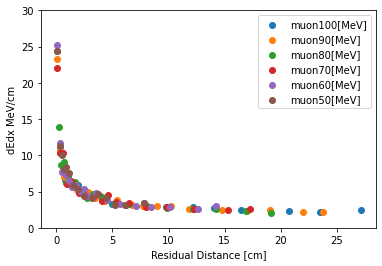

In [16]:
file_dir = 'muon_output/'
filename = ['muon100.h5', 'muon90.h5','muon80.h5','muon70.h5','muon60.h5','muon50.h5']

for i in filename:
    with h5py.File(file_dir+i, 'r') as f:
        t = np.array(f['segments'])
        
        for j in range(0, t['eventID'][-1]):
            mask = ((t['eventID']==j)&(t['pdgId']==13))
            selected_track = t[mask]
            select_tracks_de = np.array(selected_track['dEdx'], dtype=float)
            
            if selected_track['x_start'].size>0:
                
                t_max = len(selected_track)-1

                x_s = selected_track['x_start'][0]
                y_s = selected_track['y_start'][0]
                z_s = selected_track['z_start'][0]
                x_e = selected_track['x_end'][t_max]
                y_e = selected_track['y_end'][t_max]
                z_e = selected_track['z_end'][t_max]

                x_track = (x_e - selected_track['x']) 
                y_track = (y_e-selected_track['y']) 
                z_track = (z_e-selected_track['z']) 
                dist = np.sqrt(x_track**2 + y_track**2 + z_track**2)
        
        label = str(i).split('.')[0] + '[MeV]'
        plt.scatter(dist, select_tracks_de, cmap=plt.cm.jet, label=label)



plt.xlabel('Residual Distance [cm]')
plt.ylabel('dEdx MeV/cm')
plt.ylim(0,30)
plt.legend()
plt.savefig('dEdx vs dx.png', facecolor='w')

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

for i in filename:
    with h5py.File(file_dir+i, 'r') as f:
        t = np.array(f['segments'])

        mask = ((t['eventID']==1)&(t['pdgId']==13))
        selected_track = t[mask]        
        for it,t in enumerate(selected_tracks):
            if it == 0:
                ax.plot((t["x_start"], t["x_end"]), 
                    (t["y_start"], t["y_end"]),
                    (t['z_start'], t['z_end']),
#                     c='r',
                    lw=1,
                    alpha=1,
                    zorder=10,
                    label='Geant4 detector segment')
            else:
                ax.plot((t["x_start"], t["x_end"]), 
                        (t["y_start"], t["y_end"]),
                        (t['z_start'], t['z_end']),
#                         c='r',
                        lw=1,
                        alpha=1,
                        zorder=9999)
                
plt.xlabel('x-dist [cm]')
plt.ylabel('y-dist [cm]')
plt.savefig('dist.png', facecolor='w')

In [5]:
# larndsim Output

(15154,)

In [7]:
file_dir = 'muon_output/'

with h5py.File(file_dir+'muon50.h5', 'r') as f:
    t = np.array(f['segments'])

In [8]:
t['n_electrons']

array([0, 0, 0, ..., 0, 0, 0], dtype=uint32)